### This notebook is to test the Machine Learning facility of PyNeb. It is used to compare the results obtained with Direct getCrossTemDen and the ANN option. No Monte Carlo is used, it would be too heavy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn
pn.config.use_multiprocs()
import pickle 

In [2]:
%load_ext autoreload
%aimport pipeline
%autoreload 1

In [97]:
PL = pipeline.PipeLine()
PL.red_cor_obs(plot_=False)

warng EmissionLine: Atom N2r not valid
warng EmissionLine: line 4649A for atom O2r not valid
warng EmissionLine: line 4662A for atom O2r not valid
warng EmissionLine: Atom C2r not valid
warng EmissionLine: Atom N2r not valid
warng EmissionLine: Atom N2r not valid
warng EmissionLine: line 6461A for atom C2 not valid
warng EmissionLine: line 7004A for atom O4 not valid
warng EmissionLine: line 7005A for atom Ne5 not valid
warng EmissionLine: Atom O1r not valid
warng EmissionLine: Atom O1r not valid
warng EmissionLine: Atom O1r not valid
warng EmissionLine: line 8733A for atom He1r not valid
warng EmissionLine: line 8750A for atom H1r not valid


/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4607: RuntimeWarning: divide by zero encountered in true_divide
  obs_over_theo = (line1.obsIntens / line2.obsIntens) / r_theo
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4045: RuntimeWarning: invalid value encountered in multiply
  self.corrIntens = self.obsIntens * RC.getCorr(self.wave, normWave)


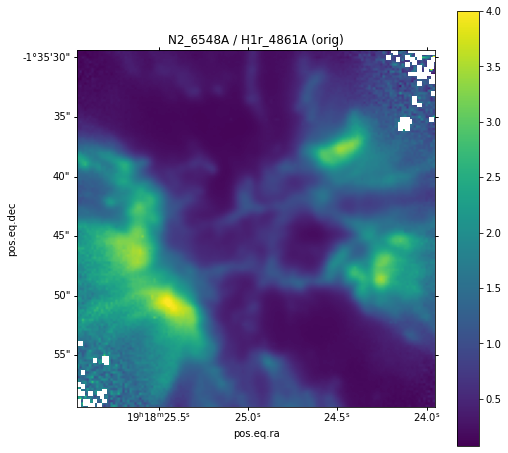

In [98]:
PL.plot(label=('N2_6548A', 'H1r_4861A'), type_='orig', vmax=4)

In [154]:
PL.make_diags()
PL.diags.ANN_inst_kwargs['verbose']=True
PL.diags.ANN_init_kwargs['activation']='tanh' #identity’, ‘logistic’, ‘tanh’, ‘relu’
PL.diags.ANN_init_kwargs['solver']= 'lbfgs' #‘lbfgs’, ‘sgd’, ‘adam’
PL.diags.ANN_init_kwargs['hidden_layer_sizes'] = (10, 20, 10)

warng Observation: No line for O2_3727A+ from NoneNone at wavelength None (blend=False)


/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: invalid value encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """ @module


In [155]:
PL.diags.diags

{'[NII] 5755/6548': ('N2', 'L(5755)/L(6548)', 'RMS([E(6548), E(5755)])'),
 '[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[NII] 5755/6584+': ('N2',
  'L(5755)/(L(6548)+L(6584))',
  'RMS([E(6548)*L(6548)/(L(6548)+L(6584)), E(6584)*L(6584)/(L(6584)+L(6548)), E(5755)])'),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SIII] 6312/9069': ('S3', 'L(6312)/L(9069)', 'RMS([E(9069), E(6312)])'),
 '[ClIII] 5538/5518': ('Cl3', 'L(5538)/L(5518)', 'RMS([E(5518), E(5538)])'),
 '[ArIV] 4740/4711': ('Ar4', 'L(4740)/L(4711)', 'RMS([E(4711), E(4740)])')}

In [156]:
try:
    Te1, Ne1, Te2, Ne2, Te3, Ne3 = pickle.load(open('TeNe.pickle', 'rb'))
except:
    pn.log_.timer('Starting', quiet=True)
    pn.log_.level = 2
    Te1, Ne1 = PL.diags.getCrossTemDen('[NII] 5755/6548', '[SII] 6731/6716', obs=PL.obs)
    print('-----------')
    Te2, Ne2 = PL.diags.getCrossTemDen('[SIII] 6312/9069', '[ClIII] 5538/5518', obs=PL.obs)
    print('-----------')
    Te3, Ne3 = PL.diags.getCrossTemDen('[SIII] 6312/9069', '[SII] 6731/6716', obs=PL.obs)
    pn.log_.timer('Direct getCrossTemDen done')
    pickle.dump((Te1, Ne1, Te2, Ne2, Te3, Ne3), open('TeNe.pickle','wb'))
PL.TeNe['N2S2D'] = {'Te': Te1, 'Ne': Ne1}
PL.TeNe['S3Cl3D'] = {'Te': Te2, 'Ne': Ne2}
PL.TeNe['S3S2D'] = {'Te': Te3, 'Ne': Ne3}
# 33 minutes on 12 procs.

In [171]:
pn.log_.timer('Starting', quiet=True)
force = False
save = True
PL.add_gCTD('N2S2', '[NII] 5755/6548', '[SII] 6731/6716', force=force, save=save)
PL.add_gCTD('S3Cl3', '[SIII] 6312/9069', '[ClIII] 5538/5518', force=force, save=save)
PL.add_gCTD('S3S2', '[SIII] 6312/9069', '[SII] 6731/6716', force=force, save=save)
pn.log_.timer('ANN getCrossTemDen done') # 22 secs

   None: ANN getCrossTemDen done in 0.08061599731445312


/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: invalid value encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: invalid value encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: invalid value encountered in true_divide
  """ @module


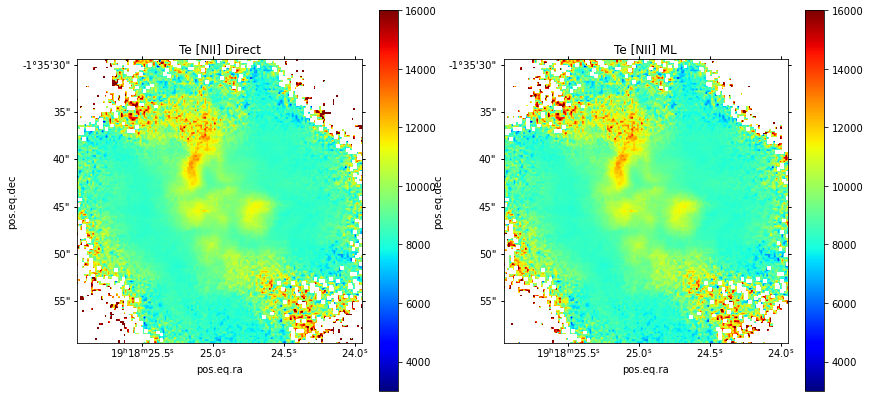

In [165]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 7), subplot_kw={'projection': PL.wcs})
PL.plot(ax=ax1, data=PL.TeNe['N2S2D']['Te'], vmin=3000, vmax=16000, type_='orig', title='Te [NII] Direct', cmap='jet')
PL.plot(ax=ax2, data=PL.TeNe['N2S2']['Te'], vmin=3000, vmax=16000, type_='orig', title='Te [NII] ML', cmap='jet')

In [166]:
def compare(diag, var, label, delta_range=5, use_log=False):
    f = plt.figure(figsize=(10, 10))
    ax1 = f.add_subplot(221, projection = PL.wcs)
    ax2 = f.add_subplot(222, projection = PL.wcs)
    ax3 = f.add_subplot(223)
    ax4 = f.add_subplot(224)
    d1 = PL.TeNe[diag+'D'][var]
    d2 = PL.TeNe[diag][var]
    if use_log:
        d1 = np.log10(d1)
        d2 = np.log10(d2)
    vmin = np.nanmin(d2)
    vmax = np.nanmax(d2)
    delta = (d1.ravel()-d2.ravel()) / d1.ravel() * 100
    PL.plot(ax=ax1, data=d1, vmin=vmin, vmax=vmax, type_='orig', title='{} direct'.format(label), cmap='jet')
    PL.plot(ax=ax2, data=(d1-d2)/d2*100, vmin=-delta_range, vmax=delta_range, type_='orig', title='{} Difference [%]'.format(label), cmap='jet')
    ax3.hist(delta, bins=np.linspace(-delta_range, delta_range, 100))
    ax3.set_xlabel('{} Difference [%]'.format(label))
    ax4.scatter(d1.ravel(), delta, alpha=0.01)
    ax4.set_xlim(vmin, vmax)
    ax4.set_ylim(-delta_range, delta_range)
    ax4.set_xlabel('{}'.format(label))
    ax4.set_ylabel('{} Difference [%]'.format(label))

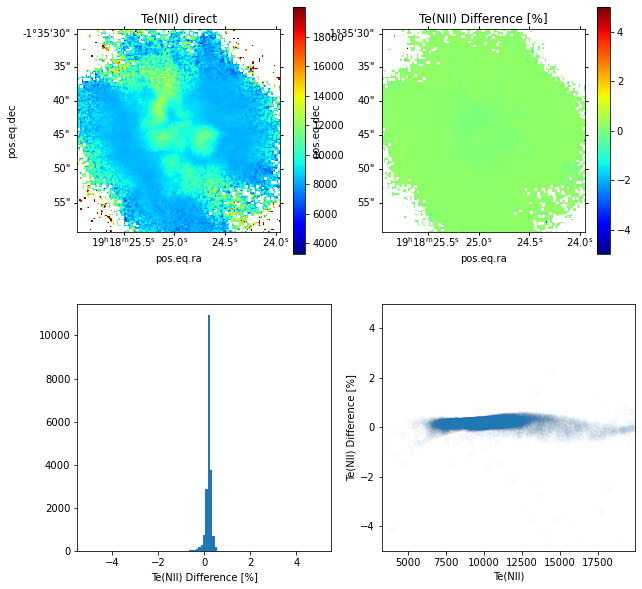

In [167]:
compare('N2S2', 'Te', label='Te(NII)')

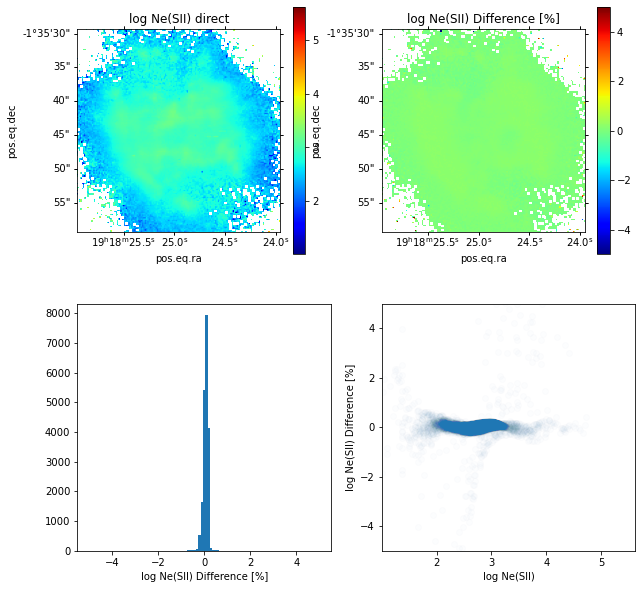

In [168]:
compare('N2S2', 'Ne', label='log Ne(SII)', use_log=True)

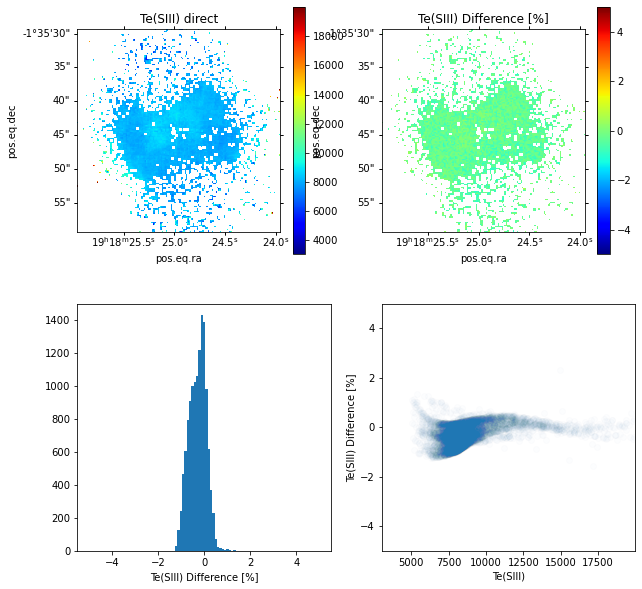

In [169]:
compare('S3Cl3', 'Te', label='Te(SIII)')

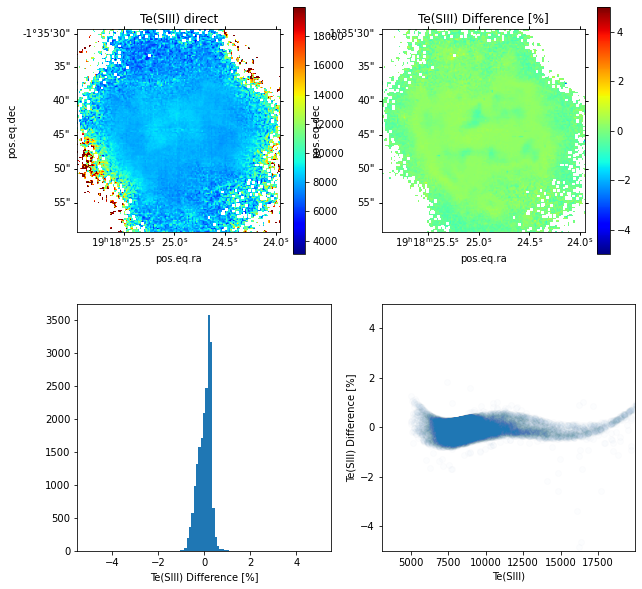

In [170]:
compare('S3S2', 'Te', label='Te(SIII)')